In [1]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
from numpy import ndarray
%matplotlib inline

Задача.

Сгенерируем $M = 100$ выборок $X_1, ..., X_{1000}$ из равномерного распределения на отрезке $[0, \theta]$ (возьмем три произвольных положительных значения $\theta$). Для каждой выборки $X_1, . . . , X_n$ для всех $n \leq 1000$ посчитаем оценки
параметра $\theta$ из теоретической задачи: $2\bar{X}, (n+1)X_{(1)}, X_{(1)} + X_{(n)}, \frac{(n+1)}{n}X_{(n)}$.


Посчитаем для всех полученых оценок $\hat{\theta} $ квадратичную функцию потерь $(\hat{\theta} − \theta)^2$ и для каждого фиксированного n усредним по выборкам. Для каждого из трех значений $\theta$ построем графики усредненных функций потерь в зависимости от $n$.

In [89]:
# Функция, считающая среднее значение, первую порядковую статистику, последнюю порядковую статистику для каждого n <= len(X).
def my_values(X):
    summ = 0.
    cur_min = 100.
    cur_max = -100.
    mean = np.zeros(len(X))
    first_order = np.zeros(len(X))
    last_order = np.zeros(len(X))
    for j, i in enumerate(X):
        summ += i
        mean[j] = summ / (j + 1)
        if i < cur_min:
            cur_min = i
        if i > cur_max:
            cur_max = i
        first_order[j] = cur_min
        last_order[j] = cur_max
        
    return mean, first_order, last_order

In [96]:
# Функция считающая квадратичную функцию потерь.
def quadratic_loss(x, y):
    x = np.array(x)
    return (x - y) ** 2

In [120]:
# Функция, выполняющая эксперимент для фиксированного значения theta.
def do_task(theta, M = 100, sample_size = 1000, ylim1=0, ylim2=0):
    # Массив, по которому мы в дальнейшем усредним функции потерь.
    estimates_loss_array = ndarray(shape=(M, sample_size, 4))
    for i in range(M):
        # Генерируем выборку.
        uniform = stats.uniform(loc=0, scale=theta)
        sample = uniform.rvs(size=sample_size)
        
        # Считаем оценки параметра theta для каждого n <= N
        # Получаем среднее, первую порядковую статистику и последнюю.
        mean, first_order, last_order = my_values(sample)
        
        # Считаем оценки в описанном выше порядке.
        estimate_0 = 2 * mean
        estimate_1 = np.array([(n + 2) * first_order[n] for n in range(sample_size)])
        estimate_2 = first_order + last_order
        estimate_3 = ([((n + 2) / (n + 1)) * last_order[n] for n in range(sample_size)])
        
        # Посчитаем для всех полученных оценок квадратичную функцию потерь.
        # И запишем полученное в массив оценок.
        estimates_loss_array[i, :, 0] = quadratic_loss(estimate_0, theta)
        estimates_loss_array[i, :, 1] = quadratic_loss(estimate_1, theta)
        estimates_loss_array[i, :, 2] = quadratic_loss(estimate_2, theta)
        estimates_loss_array[i, :, 3] = quadratic_loss(estimate_3, theta)
    
    # Теперь для каждого фиксированного n усредним по всем выборкам квадратичную функцию потерь.
    mean_loss_array = np.mean(estimates_loss_array, axis=0)
    
    # Нарисуем графики усредненных функций потерь в зависимости от n.
    #(n+1)X_1 вынесим на отдельный график, так как знаем, что она не сходится к theta.
    n = range(sample_size)
    plt.figure(figsize=(10, 7))
    plt.xlabel("n")
    plt.ylabel(r"Mean quadratic loss")
    plt.plot(n, mean_loss_array[:, 0], color='b', label=r"$2\bar{X} $")
    plt.plot(n, mean_loss_array[:, 2], color='y', label=r"$X_{(1)} + X_{(n)}$")
    plt.plot(n, mean_loss_array[:, 3], color='purple', label=r"$\frac{(n+1)}{n}X_{(n)}$")
    if ylim1 !=0:
        pylab.ylim(0, ylim1)
    plt.title(r'Quadratic loss of different estimates', fontsize=10)
    plt.legend(fontsize=15, loc=2)
    plt.show()
    
    #Значения на последнем шаге.
    print('The difference on the last step:')
    print('blue: ', mean_loss_array[sample_size - 1, 0])
    print('yellow: ', mean_loss_array[sample_size - 1, 2])
    print('purple: ', mean_loss_array[sample_size - 1, 3])
    
    # Теперь график для (n+1)X_1
    plt.figure(figsize=(10, 7))
    plt.xlabel("n")
    plt.ylabel(r"Mean quadratic loss")
    plt.plot(n, mean_loss_array[:, 1], color='g', label=r"$(n+1)X_{(1)}$")
    if ylim2 !=0:
        pylab.ylim(0, ylim2)
    plt.title(r'Quadratic loss of $(n+1)X_{(1)}$', fontsize=10)
    plt.legend(fontsize=15, loc=2)
    plt.show()
    print('The difference on the last step:')
    print('green: ', mean_loss_array[sample_size - 1, 1])

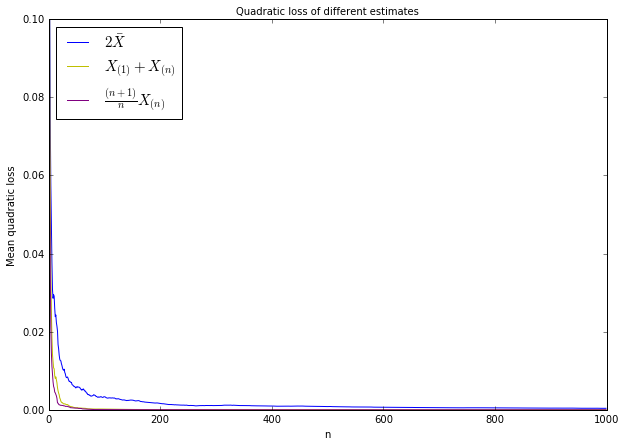

The difference on the last step:
blue:  0.000380170365171
yellow:  2.72880739481e-06
purple:  9.34091320233e-07


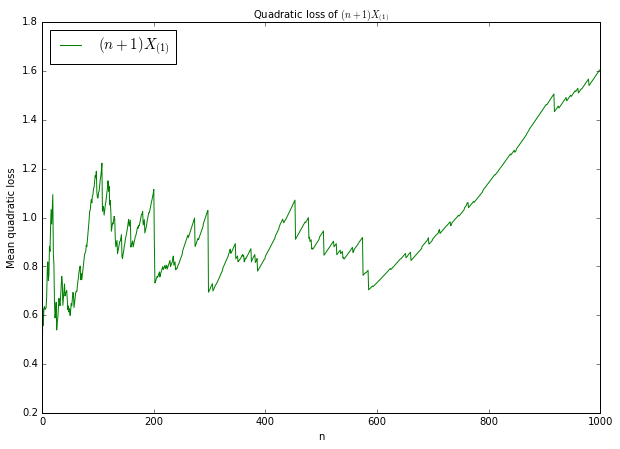

The difference on the last step:
green:  1.60435763276


In [121]:
# theta = 1
do_task(1., ylim1=0.10)

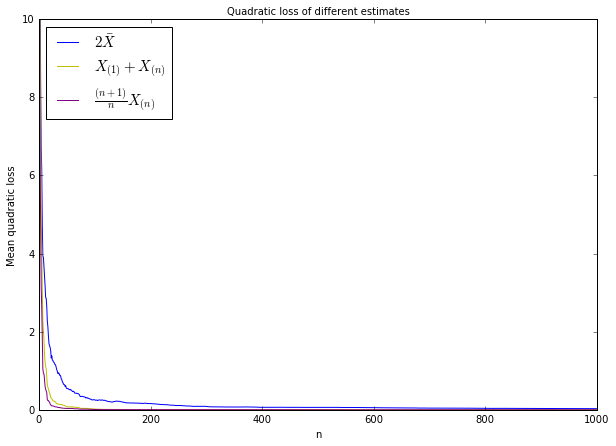

The difference on the last step:
blue:  0.0289573398108
yellow:  0.0002361654806
purple:  0.000148134047723


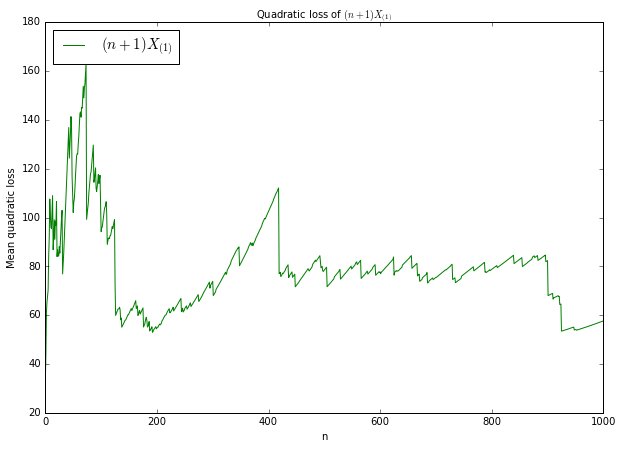

The difference on the last step:
green:  57.5389987892


In [122]:
# theta = 10
do_task(10., ylim1=10)

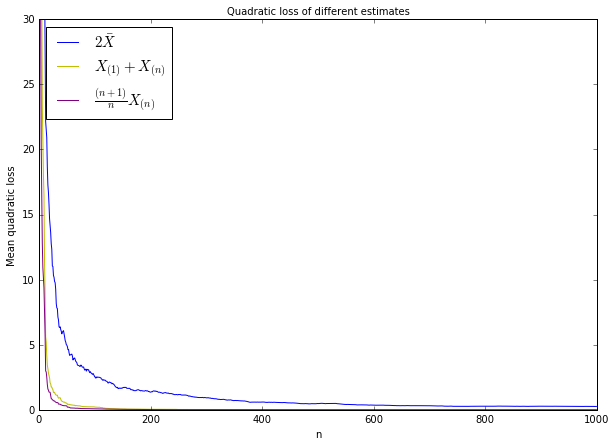

The difference on the last step:
blue:  0.258414496923
yellow:  0.0020848230151
purple:  0.000959719983239


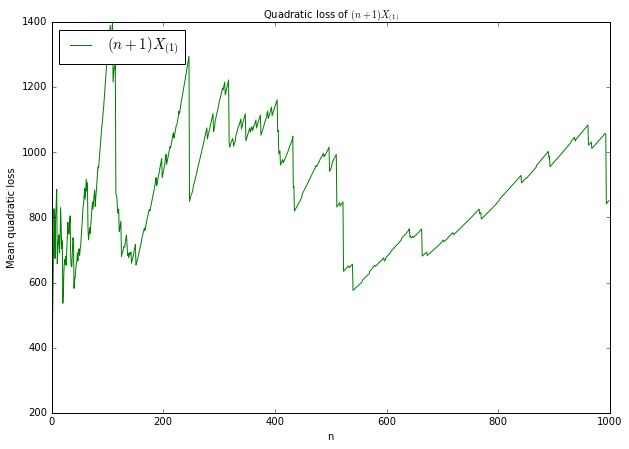

The difference on the last step:
green:  851.681738038


In [123]:
# theta = 30
do_task(30., ylim1=30)

#### Вывод. Квадратичная функция потерь сходится к 0 быстрее всего у $\frac{(n+1)}{n}X_{(n)}$, затем $X_{(1)} + X_{(n)}$ и после него $2\bar{X}$, а у оценки $(n+1)X_{(1)}$ квадратичная функция функция потерь вообще не сходится.
#### Результаты этого задания хорошо согласуются с результатами задачи 2.1.